## Výsledné vnitřní účinky - Příklad 1:

### Zadání:

Určete početně a graficky výsledné vnitřní účinky u prutu podle obrázku.

*Poznámka*: Příklad řeší úlohu diferenciálním způsobem, doporučuji si výsledné vytahy zkontrolovat výpočtem vedeným integrální cestou.

*Úkol*: *Odvoďte vztahy pro výsledné vnitřní účinky integrálním způsobem a srovnejte s výsledky uvedenými níže.*

### Řešení:

Nejdříve zavedeme potředné knihovny

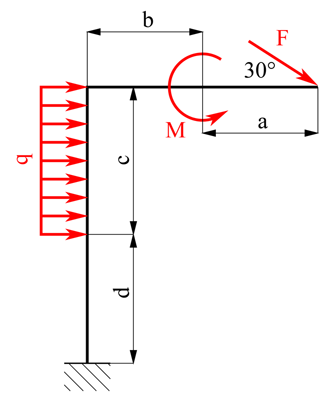

In [1]:
%matplotlib inline
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Image
Image(filename='ram1.png')

Zavedení potřebných proměnných:

In [2]:
T1,T2,T3,T4=sp.symbols('T1 T2 T3 T4')
M1,M2,M3,M4=sp.symbols('M1 M2 M3 M4')
C1,C2,C3=sp.symbols('C1 C2 C3')
x1,x2,x3,x4=sp.symbols('x1 x2 x3 x4')
a,b,c,d=sp.symbols('a b c d')
F,M,q=sp.symbols('F M q')
sp.init_printing()

Uvolňujeme *zprava*, proto je nutné změnit znaménka u *Schwedler*ových vztahů:
\begin{eqnarray}
  \frac{\mathrm{d}N}{\mathrm{d}x}&=&0 \qquad \Rightarrow \qquad N=C_1, \\
  \frac{\mathrm{d}T}{\mathrm{d}x}&=&q \qquad \Rightarrow \qquad T=\int q\mathrm{d}x+C_2, \\
  \frac{\mathrm{d}M}{\mathrm{d}x}&=&-T \qquad \Rightarrow \qquad M=-\int T\mathrm{d}x+C_3.
\end{eqnarray}
Konstanty $C_1$, $C_2$ a $C_3$ se stanoví z okrajových podmínek a podmínek spojitosti průběhů *VVÚ*, tedy

\begin{eqnarray}
 &&N_i=N_{i-1}, \\
 &&T_i=T_{i-1}
\end{eqnarray}

a

$$
  M_i=M_{i-1}.
$$
  
V případě přechodu přes zalomení prutu,

\begin{eqnarray}
  &&N_i=-T_{i-1}, \\
  &&T_i=N_{i-1}
\end{eqnarray}

a 

$$
  M_i=M_{i-1}.
$$

Index $i$ je číslo daného úseku.

**Usek I:**

Délka úseku,
\begin{equation}
  x_1\in\left(0,a\right).
\end{equation}

Okrajové podmínky,
\begin{eqnarray}
  N_1(0)&=&\frac{\sqrt{3}}{2}F, \\
  T_1(0)&=&\frac{1}{2}F, \\
  M_1(0)&=&0.
\end{eqnarray}

Vnitřní účinky mají tvar,

In [3]:
N1=C1
T1=C2
M1=-sp.integrate(T1,x1)+C3
N1,T1,M1

Okrajové podmínky pro $x_1=0$ vedou na následující soustavu algebraických rovnic pro neznámé $C_1$, $C_2$ a $C_3$,

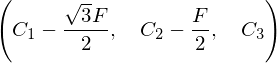

In [4]:
eq1=N1.subs(x1,0)-sp.sqrt(3)/2*F
eq2=T1.subs(x1,0)-sp.Rational(1,2)*F
eq3=M1.subs(x1,0)
eq1,eq2,eq3

Tato soustava má řešení,

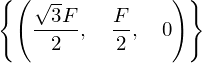

In [5]:
sol=sp.linsolve((eq1,eq2,eq3),(C1,C2,C3))
sol

Jejich dosazením zpět do $N_1(x_1)$, $T_1(x_1)$ a $M_1(x_1)$ se dostane

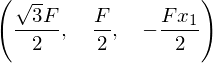

In [6]:
C1_solved,C2_solved,C3_solved=next(iter(sol))
N1_sol=N1.subs(C1,C1_solved)
T1_sol=T1.subs(C2,C2_solved)
M1_sol=M1.subs({C2:C2_solved,C3:C3_solved})
N1_sol,T1_sol,M1_sol

**Usek II:**

Délka úseku,
\begin{equation}
  x_2\in\left(0,b\right).
\end{equation}

Okrajové podmínky,
\begin{eqnarray}
  N_2(0)&=&N_1(a), \\
  T_2(0)&=&T_1(a), \\
  M_2(0)&=&M_1(a)+\mathcal{M}.
\end{eqnarray}

Vnitřní účinky mají tvar,

In [7]:
N2=C1
T2=C2
M2=-sp.integrate(T2,x2)+C3
N2,T2,M2

Aplikace okrajových podmínek pro $x_2=0$ vede na soustavu albraických rovnic pro neznámé $C_1$, $C_2$ a $C_3$,

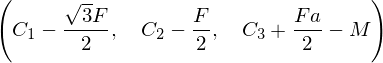

In [8]:
eq1=N2.subs(x2,0)-N1_sol.subs(x1,a)
eq2=T2.subs(x2,0)-T1_sol.subs(x1,a)
eq3=M2.subs(x2,0)-M1_sol.subs(x1,a)-M
eq1,eq2,eq3

Tato soustava rovnic má řešení,

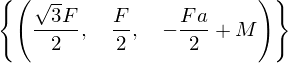

In [9]:
sol=sp.linsolve((eq1,eq2,eq3),(C1,C2,C3))
sol

které se opět dosadí zpět do vztahů pro $N_2(x_2)$, $T_2(x_2)$ a $M_2(x_2)$,

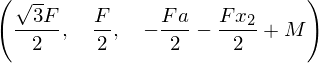

In [10]:
C1_solved,C2_solved,C3_solved=next(iter(sol))
N2_sol=N2.subs(C1,C1_solved)
T2_sol=T2.subs(C2,C2_solved)
M2_sol=M2.subs({C2:C2_solved,C3:C3_solved})
N2_sol,T2_sol,M2_sol

**Usek III:**

Délka úseku,
\begin{equation}
  x_3\in\left(0,c\right).
\end{equation}

Okrajové podmínky,
\begin{eqnarray}
  N_3(0)&=&-T_2(b), \\
  T_3(0)&=&N_2(b), \\
  M_3(0)&=&M_2(b).
\end{eqnarray}

Vnitřní účinky mají na tomto úseku tvar,

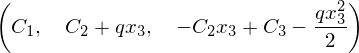

In [11]:
N3=C1
T3=sp.integrate(q,x3)+C2
M3=-sp.integrate(T3,x3)+C3
N3,T3,M3

Okrajové podmínky vedou na soustavu algebraických rovnic pro neznámé $C_1$, $C_2$ a $C_3$,

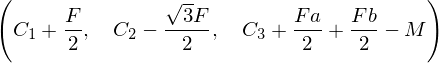

In [12]:
eq1=N3.subs(x3,0)+T2_sol.subs(x2,b)
eq2=T3.subs(x3,0)-N2_sol.subs(x2,b)
eq3=M3.subs(x3,0)-M2_sol.subs(x2,b)
eq1,eq2,eq3

Tato soustava má řešení,

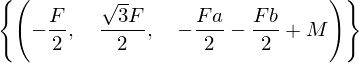

In [13]:
sol=sp.linsolve((eq1,eq2,eq3),(C1,C2,C3))
sol

které se dosadí zpět do výrazů pro $N_3(x_3)$, $T_3(x_3)$ a $M_3(x_3)$,

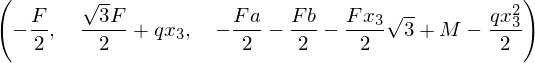

In [14]:
C1_solved,C2_solved,C3_solved=next(iter(sol))
N3_sol=N3.subs(C1,C1_solved)
T3_sol=T3.subs(C2,C2_solved)
M3_sol=M3.subs({C2:C2_solved,C3:C3_solved})
N3_sol,T3_sol,M3_sol

**Usek IV:**

Délka úseku,
\begin{equation}
  x_4\in\left(0,d\right).
\end{equation}

Okrajové podmínky,
\begin{eqnarray}
  N_4(0)&=&N_3(c), \\
  T_4(0)&=&T_3(c), \\
  M_4(0)&=&M_3(c).
\end{eqnarray}

Vnitřní účinky mají na tomto úseku tvar,

In [15]:
N4=C1
T4=C2
M4=-sp.integrate(T4,x4)+C3
N4,T4,M4

Okrajové podmínky pro $x_4=0$ vedou na soustavu algebraických rovnic pro neznámé $C_1$, $C_2$ a $C_3$,

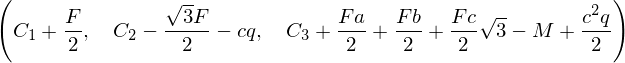

In [16]:
eq1=N4.subs(x4,0)-N3_sol.subs(x3,c)
eq2=T4.subs(x4,0)-T3_sol.subs(x3,c)
eq3=M4.subs(x4,0)-M3_sol.subs(x3,c)
eq1,eq2,eq3

Tato soustava má řešení,

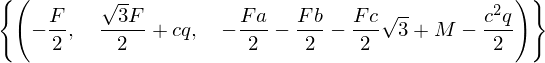

In [17]:
sol=sp.linsolve((eq1,eq2,eq3),(C1,C2,C3))
sol

které se dosadí zpět do výrazů pro $N_4(x_4)$, $T_4(x_4)$ a $M_4(x_4)$,

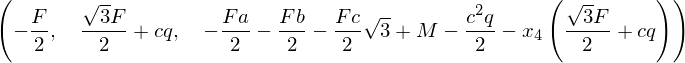

In [18]:
C1_solved,C2_solved,C3_solved=next(iter(sol))
N4_sol=N4.subs(C1,C1_solved)
T4_sol=T4.subs(C2,C2_solved)
M4_sol=M4.subs({C2:C2_solved,C3:C3_solved})
N4_sol,T4_sol,M4_sol

*Vykreslení výsledků*

Zvolené numerické hodnoty parametrů $a$, $b$, $c$ a $d$ a zatížení $|\boldsymbol{F}|$, $|\boldsymbol{\mathcal{M}}|$ a $|\boldsymbol{q}|$,

In [19]:
a_,b_,c_,d_=1.,2.,3.,4.
F_,M_,q_=1.,10.,1.

Hodnoty $N(x)$, $T(x)$ a $M(x)$ na jednotlivých úsecích pro dané pole hodnot $x_1$, $x_2$, $x_3$ a $x_4$,

In [20]:
x1_=np.linspace(0,a_,20)
N1_plot=[N1_sol.subs({F:F_}) for ii in x1_]
T1_plot=[T1_sol.subs({F:F_}) for ii in x1_]
M1_plot=[M1_sol.subs({F:F_,x1:ii}) for ii in x1_]
x2_=np.linspace(0,b_,20)
N2_plot=[N2_sol.subs({F:F_,M:M_,a:a_}) for ii in x2_]
T2_plot=[T2_sol.subs({F:F_,M:M_,a:a_}) for ii in x2_]
M2_plot=[M2_sol.subs({F:F_,M:M_,x2:ii,a:a_}) for ii in x2_]
x3_=np.linspace(0,c_,20)
N3_plot=[N3_sol.subs({F:F_}) for ii in x3_]
T3_plot=[T3_sol.subs({x3:ii,F:F_,q:q_}) for ii in x3_]
M3_plot=[M3_sol.subs({F:F_,M:M_,x3:ii,a:a_,b:b_,q:q_}) for ii in x3_]
x4_=np.linspace(0,d_,20)
N4_plot=[N4_sol.subs({F:F_}) for ii in x4_]
T4_plot=[T4_sol.subs({x3:ii,F:F_,q:q_,c:c_}) for ii in x4_]
M4_plot=[M4_sol.subs({F:F_,M:M_,x4:ii,a:a_,b:b_,q:q_,c:c_}) for ii in x4_]

Jednotlivé grafy spojíme:

In [21]:
x12,N12,T12,M12,x34,N34,T34,M34=[],[],[],[],[],[],[],[]
for ii in range(20):
  x12.append(x1_[ii])
  N12.append(float(N1_plot[ii]))
  T12.append(float(T1_plot[ii]))
  M12.append(float(M1_plot[ii]))
  x34.append(x3_[ii])
  N34.append(float(N3_plot[ii]))
  T34.append(float(T3_plot[ii]))
  M34.append(float(M3_plot[ii]))
for ii in range(20):
  x12.append(x2_[ii]+a_)
  N12.append(float(N2_plot[ii]))  
  T12.append(float(T2_plot[ii]))
  M12.append(float(M2_plot[ii]))
  x34.append(x4_[ii]+c_)
  N34.append(float(N4_plot[ii]))
  T34.append(float(T4_plot[ii]))
  M34.append(float(M4_plot[ii]))

Vykreslení grafů:

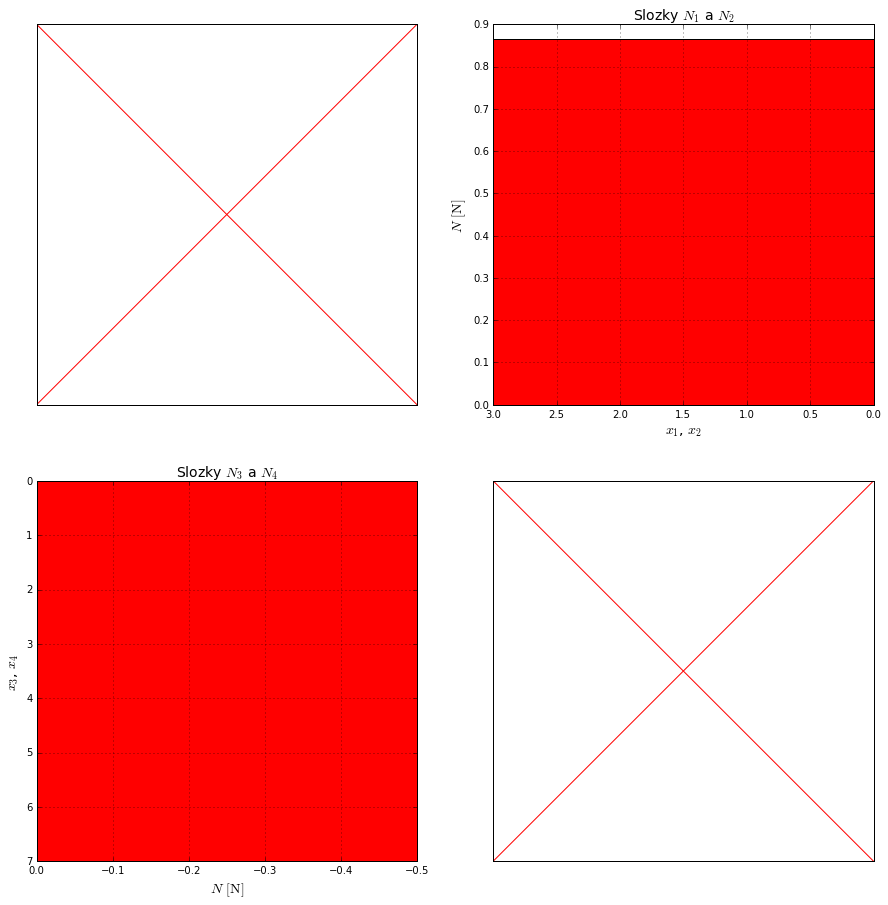

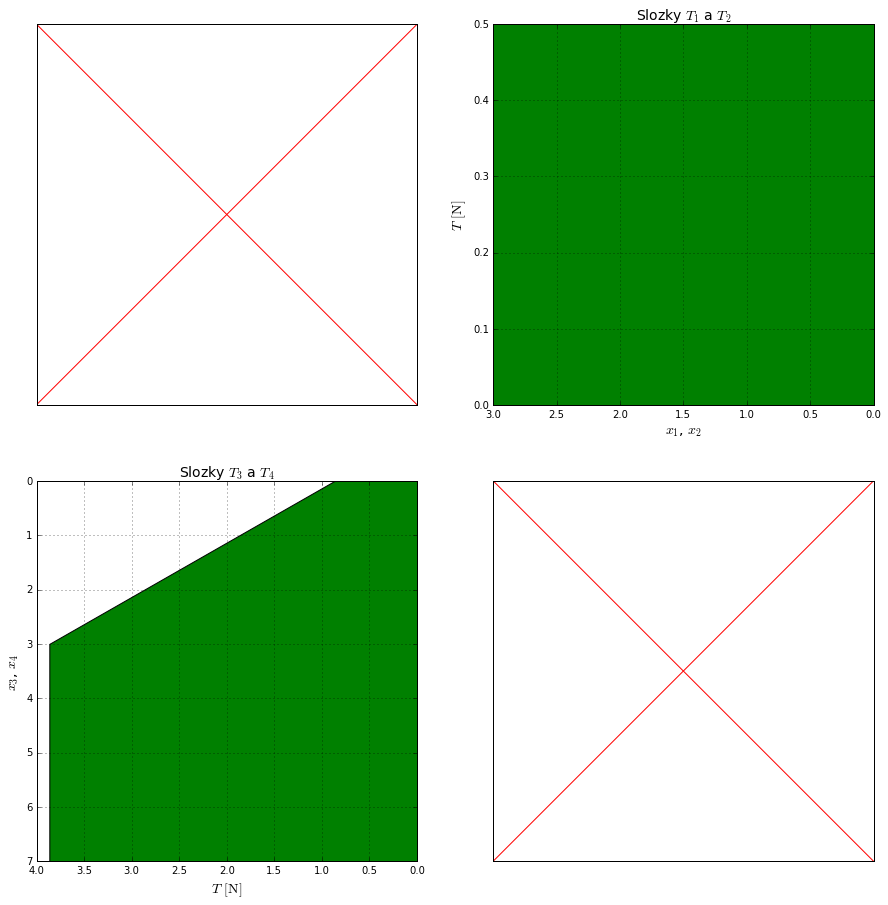

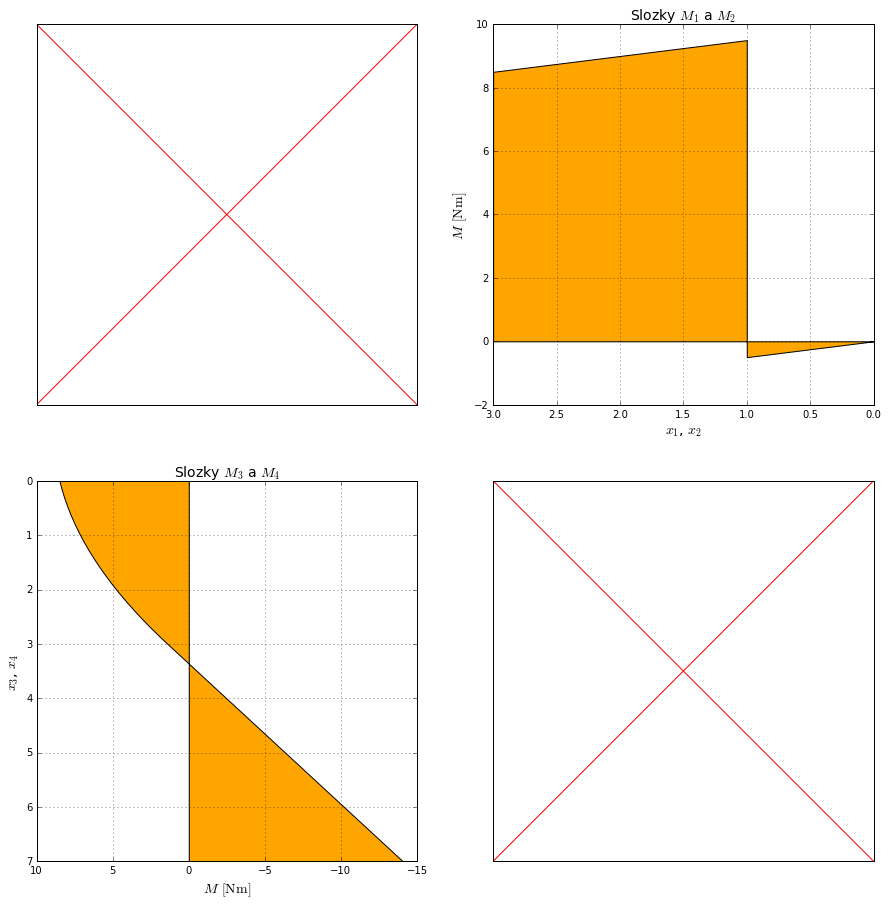

In [22]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(15,15))
 
ax1.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') # labels along the bottom edge are off
ax1.plot([0,1],[0,1],color="red")
ax1.plot([0,1],[1,0],color="red")
ax2.set_title('Slozky '+r'$N_1$'+' a '+'$N_2$').set_fontsize(14)
ax2.fill_between(x12,0,N12,facecolor='red')
ax3.set_title('Slozky '+r'$N_3$'+' a '+'$N_4$').set_fontsize(14)
ax3.fill_betweenx(x34,0,N34,facecolor='red')
ax2.invert_xaxis()
ax3.invert_xaxis()
ax3.invert_yaxis()
ax2.grid(True)
ax3.grid(True)
ax2.set_xlabel(r'$x_1$'+', '+r'$x_2$').set_fontsize(14)
ax2.set_ylabel(r'$N$'+' '+r'$\mathrm{[N]}$').set_fontsize(14)
ax3.set_ylabel(r'$x_3$'+', '+r'$x_4$').set_fontsize(14)
ax3.set_xlabel(r'$N$'+' '+r'$\mathrm{[N]}$').set_fontsize(14)
ax4.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') # labels along the bottom edge are off
ax4.plot([0,1],[0,1],color="red")
ax4.plot([0,1],[1,0],color="red")

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(15,15))
ax1.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') # labels along the bottom edge are off
ax1.plot([0,1],[0,1],color="red")
ax1.plot([0,1],[1,0],color="red")
ax2.set_title('Slozky '+r'$T_1$'+' a '+'$T_2$').set_fontsize(14)
ax2.fill_between(x12,0,T12,facecolor='green')
ax3.set_title('Slozky '+r'$T_3$'+' a '+'$T_4$').set_fontsize(14)
ax3.fill_betweenx(x34,0,T34,facecolor='green')
ax2.invert_xaxis()
ax3.invert_xaxis()
ax3.invert_yaxis()
ax2.grid(True)
ax3.grid(True)
ax2.set_xlabel(r'$x_1$'+', '+r'$x_2$').set_fontsize(14)
ax2.set_ylabel(r'$T$'+' '+r'$\mathrm{[N]}$').set_fontsize(14)
ax3.set_ylabel(r'$x_3$'+', '+r'$x_4$').set_fontsize(14)
ax3.set_xlabel(r'$T$'+' '+r'$\mathrm{[N]}$').set_fontsize(14)
ax4.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') # labels along the bottom edge are off
ax4.plot([0,1],[0,1],color="red")
ax4.plot([0,1],[1,0],color="red")

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(15,15))
ax1.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') # labels along the bottom edge are off
ax1.plot([0,1],[0,1],color="red")
ax1.plot([0,1],[1,0],color="red")
ax2.set_title('Slozky '+r'$M_1$'+' a '+'$M_2$').set_fontsize(14)
ax2.fill_between(x12,0,M12,facecolor='orange')
ax3.set_title('Slozky '+r'$M_3$'+' a '+'$M_4$').set_fontsize(14)
ax3.fill_betweenx(x34,0,M34,facecolor='orange')
ax2.invert_xaxis()
ax3.invert_xaxis()
ax3.invert_yaxis()
ax2.grid(True)
ax3.grid(True)
ax2.set_xlabel(r'$x_1$'+', '+r'$x_2$').set_fontsize(14)
ax2.set_ylabel(r'$M$'+' '+r'$\mathrm{[Nm]}$').set_fontsize(14)
ax3.set_ylabel(r'$x_3$'+', '+r'$x_4$').set_fontsize(14)
ax3.set_xlabel(r'$M$'+' '+r'$\mathrm{[Nm]}$').set_fontsize(14)
ax4.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') # labels along the bottom edge are off
ax4.plot([0,1],[0,1],color="red")
ax4.plot([0,1],[1,0],color="red")